# Gathering Data

In [220]:
import tweepy
from tweepy import OAuthHandler
import json
import time
import pandas as pd 
import numpy as np
import requests

In [131]:
#Import the twitter archive file csv into a dataframe
arch_df = pd.read_csv('twitter-archive-enhanced.csv')

In [132]:
#download tweet image predictions TSV using the Requests library and write it to image_predictions.tsv
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open('image_predictions.tsv', mode = 'wb') as file:
    file.write(response.content)
    
# Import the tweet image predictions TSV file into a dataframe
img_df = pd.read_csv('image_predictions.tsv', sep='\t')

In [133]:
#query Twitter API for each tweet in the Twitter archive and save JSON in text file
consumer_key = 'XXXXXXXXXXXXXXXXXXXXXXXXXXX'
consumer_secret = 'xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx'
access_token = 'xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx'
access_secret = 'XXXXXXXXXXXXXXXXXXXXXXXX'

auth = OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth_handler = auth,
                 wait_on_rate_limit=True,
                wait_on_rate_limit_notify = True)

In [135]:
# Using the tweet IDs in the Twitter archive, query the twitter API for each tweet's JSON
start = timer()
with open('getstatus_error.txt', 'w') as errfile:
    valid_ids = 0
    err_ids = 0
    tweet_id = arch_df.tweet_id
    with open('tweet_json.txt', 'w', encoding= 'utf-8') as outfile:
        # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
        for i, tweet_id in tweet_id.iteritems():
            try:
                print("%s# %s" % (str(i+1), tweet_id))
                tweet = api.get_status(tweet_id, tweet_mode='extended')
                                        
                json.dump(tweet._json, outfile)
                outfile.write('\n')
                valid_ids += 1
            except tweepy.TweepError as e:
                err_ids += 1
                err_str = []
                err_str.append(str(tweet_id))
                err_str.append(': ')
                err_str.append(e.response.json()['errors'][0]['message'])
                err_str.append('\n')
                errfile.write(''.join(err_str))
                print(''.join(err_str))
                continue 
        print("%s %s" % ('Valid tweets:', valid_ids))
        print("%s %s" % ('Error tweets:', err_ids))
end = time.time() #end timer
print(end - start)


1# 892420643555336193
2# 892177421306343426
3# 891815181378084864
4# 891689557279858688
5# 891327558926688256
6# 891087950875897856
7# 890971913173991426
8# 890729181411237888
9# 890609185150312448
10# 890240255349198849
11# 890006608113172480
12# 889880896479866881
13# 889665388333682689
14# 889638837579907072
15# 889531135344209921
16# 889278841981685760
17# 888917238123831296
18# 888804989199671297
19# 888554962724278272
20# 888202515573088257
888202515573088257: No status found with that ID.

21# 888078434458587136
22# 887705289381826560
23# 887517139158093824
24# 887473957103951883
25# 887343217045368832
26# 887101392804085760
27# 886983233522544640
28# 886736880519319552
29# 886680336477933568
30# 886366144734445568
31# 886267009285017600
32# 886258384151887873
33# 886054160059072513
34# 885984800019947520
35# 885528943205470208
36# 885518971528720385
37# 885311592912609280
38# 885167619883638784
39# 884925521741709313
40# 884876753390489601
41# 884562892145688576
42# 88444180538

318# 834786237630337024
319# 834574053763584002
320# 834477809192075265
321# 834458053273591808
322# 834209720923721728
323# 834167344700198914
324# 834089966724603904
325# 834086379323871233
326# 833863086058651648
327# 833826103416520705
328# 833732339549220864
329# 833722901757046785
330# 833479644947025920
331# 833124694597443584
332# 832998151111966721
333# 832769181346996225
334# 832757312314028032
335# 832682457690300417
336# 832645525019123713
337# 832636094638288896
338# 832397543355072512
339# 832369877331693569
340# 832273440279240704
341# 832215909146226688
342# 832215726631055365
343# 832088576586297345
344# 832040443403784192
345# 832032802820481025
346# 831939777352105988
347# 831926988323639298
348# 831911600680497154
349# 831670449226514432
350# 831650051525054464
351# 831552930092285952
352# 831322785565769729
353# 831315979191906304
354# 831309418084069378
355# 831262627380748289
356# 830956169170665475
357# 830583320585068544
358# 830173239259324417
359# 83009740037

651# 792883833364439040
652# 792773781206999040
653# 792394556390137856
654# 792050063153438720
655# 791821351946420224
656# 791784077045166082
657# 791780927877898241
658# 791774931465953280
659# 791672322847637504
660# 791406955684368384
661# 791312159183634433
662# 791026214425268224
663# 790987426131050500
664# 790946055508652032
665# 790723298204217344
666# 790698755171364864
667# 790581949425475584
668# 790337589677002753
669# 790277117346975746
670# 790227638568808452
671# 789986466051088384
672# 789960241177853952
673# 789903600034189313
674# 789628658055020548
675# 789599242079838210
676# 789530877013393408
677# 789314372632018944
678# 789280767834746880
679# 789268448748703744
680# 789137962068021249
681# 788908386943430656
682# 788765914992902144
683# 788552643979468800
684# 788412144018661376
685# 788178268662984705
686# 788150585577050112
687# 788070120937619456
688# 788039637453406209
689# 787810552592695296
690# 787717603741622272
691# 787397959788929025
692# 78732244394

Rate limit reached. Sleeping for: 285


902# 758474966123810816
903# 758467244762497024
904# 758405701903519748
905# 758355060040593408
906# 758099635764359168
907# 758041019896193024
908# 757741869644341248
909# 757729163776290825
910# 757725642876129280
911# 757611664640446465
912# 757597904299253760
913# 757596066325864448
914# 757400162377592832
915# 757393109802180609
916# 757354760399941633
917# 756998049151549440
918# 756939218950160384
919# 756651752796094464
920# 756526248105566208
921# 756303284449767430
922# 756288534030475264
923# 756275833623502848
924# 755955933503782912
925# 755206590534418437
926# 755110668769038337
927# 754874841593970688
928# 754856583969079297
929# 754747087846248448
930# 754482103782404096
931# 754449512966619136
932# 754120377874386944
933# 754011816964026368
754011816964026368: No status found with that ID.

934# 753655901052166144
935# 753420520834629632
936# 753398408988139520
937# 753375668877008896
938# 753298634498793472
939# 753294487569522689
940# 753039830821511168
941# 75302697

1232# 713177543487135744
1233# 713175907180089344
1234# 712809025985978368
1235# 712717840512598017
1236# 712668654853337088
1237# 712438159032893441
1238# 712309440758808576
1239# 712097430750289920
1240# 712092745624633345
1241# 712085617388212225
1242# 712065007010385924
1243# 711998809858043904
1244# 711968124745228288
1245# 711743778164514816
1246# 711732680602345472
1247# 711694788429553666
1248# 711652651650457602
1249# 711363825979756544
1250# 711306686208872448
1251# 711008018775851008
1252# 710997087345876993
1253# 710844581445812225
1254# 710833117892898816
1255# 710658690886586372
1256# 710609963652087808
1257# 710588934686908417
1258# 710296729921429505
1259# 710283270106132480
1260# 710272297844797440
1261# 710269109699739648
1262# 710153181850935296
1263# 710140971284037632
1264# 710117014656950272
1265# 709918798883774466
1266# 709901256215666688
1267# 709852847387627521
1268# 709566166965075968
1269# 709556954897764353
1270# 709519240576036864
1271# 709449600415961088


1560# 688547210804498433
1561# 688519176466644993
1562# 688385280030670848
1563# 688211956440801280
1564# 688179443353796608
1565# 688116655151435777
1566# 688064179421470721
1567# 687841446767013888
1568# 687826841265172480
1569# 687818504314159109
1570# 687807801670897665
1571# 687732144991551489
1572# 687704180304273409
1573# 687664829264453632
1574# 687494652870668288
1575# 687480748861947905
1576# 687476254459715584
1577# 687460506001633280
1578# 687399393394311168
1579# 687317306314240000
1580# 687312378585812992
1581# 687127927494963200
1582# 687124485711986689
1583# 687109925361856513
1584# 687102708889812993
1585# 687096057537363968
1586# 686947101016735744
1587# 686760001961103360
1588# 686749460672679938
1589# 686730991906516992
1590# 686683045143953408
1591# 686618349602762752
1592# 686606069955735556
1593# 686394059078897668
1594# 686386521809772549
1595# 686377065986265092
1596# 686358356425093120
1597# 686286779679375361
1598# 686050296934563840
1599# 686035780142297088


Rate limit reached. Sleeping for: 283


1802# 676957860086095872
1803# 676949632774234114
1804# 676948236477857792
1805# 676946864479084545
1806# 676942428000112642
1807# 676936541936185344
1808# 676916996760600576
1809# 676897532954456065
1810# 676864501615042560
1811# 676821958043033607
1812# 676819651066732545
1813# 676811746707918848
1814# 676776431406465024
1815# 676617503762681856
1816# 676613908052996102
1817# 676606785097199616
1818# 676603393314578432
1819# 676593408224403456
1820# 676590572941893632
1821# 676588346097852417
1822# 676582956622721024
1823# 676575501977128964
1824# 676533798876651520
1825# 676496375194980353
1826# 676470639084101634
1827# 676440007570247681
1828# 676430933382295552
1829# 676263575653122048
1830# 676237365392908289
1831# 676219687039057920
1832# 676215927814406144
1833# 676191832485810177
1834# 676146341966438401
1835# 676121918416756736
1836# 676101918813499392
1837# 676098748976615425
1838# 676089483918516224
1839# 675898130735476737
1840# 675891555769696257
1841# 675888385639251968


2130# 670290420111441920
2131# 670093938074779648
2132# 670086499208155136
2133# 670079681849372674
2134# 670073503555706880
2135# 670069087419133954
2136# 670061506722140161
2137# 670055038660800512
2138# 670046952931721218
2139# 670040295598354432
2140# 670037189829525505
2141# 670003130994700288
2142# 669993076832759809
2143# 669972011175813120
2144# 669970042633789440
2145# 669942763794931712
2146# 669926384437997569
2147# 669923323644657664
2148# 669753178989142016
2149# 669749430875258880
2150# 669684865554620416
2151# 669683899023405056
2152# 669682095984410625
2153# 669680153564442624
2154# 669661792646373376
2155# 669625907762618368
2156# 669603084620980224
2157# 669597912108789760
2158# 669583744538451968
2159# 669573570759163904
2160# 669571471778410496
2161# 669567591774625800
2162# 669564461267722241
2163# 669393256313184256
2164# 669375718304980992
2165# 669371483794317312
2166# 669367896104181761
2167# 669363888236994561
2168# 669359674819481600
2169# 669354382627049472


In [765]:
df_list = []
with open('tweet_json.txt','r') as json_file:
    for line in json_file:
        status = json.loads(line)
        
        #append to list of dictionaries
        df_list.append({'tweet_id': status['id'],
                       'retweet_count': status['retweet_count'],
                        'favorite_count' : status['favorite_count']
                       })
# Create a DataFrame with tweet ID, retweet count, favorite count and display_text_range
status_df = pd.DataFrame(df_list, columns = ['tweet_id','retweet_count','favorite_count'])

# Assessing Data

In [767]:
status_df.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7657,35984
1,892177421306343426,5659,31057
2,891815181378084864,3753,23369
3,891689557279858688,7813,39258
4,891327558926688256,8423,37493


In [768]:
status_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2331 non-null   int64
 1   retweet_count   2331 non-null   int64
 2   favorite_count  2331 non-null   int64
dtypes: int64(3)
memory usage: 54.8 KB


In [769]:
status_df.to_csv('tweet-stats.csv')

Status_df, change the display_text to the last just the last number and change the data type from an interger

Join the status_df and the arch on the from tweet id, which is missing 25 tweets

In [770]:
arch_df.sample(25)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2346,666058600524156928,NaN,NaN,2015-11-16 01:01:59 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is the Rand Paul of retrievers folks! He's probably good at poker. Can drink beer (lol rad). 8/10 good dog https://t.co/pYAJkAe76p,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666058600524156928/photo/1,8,10,the,None,None,None,None
1876,675111688094527488,NaN,NaN,2015-12-11 00:35:44 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to Oliver. He thought what was inside the pillow should be outside the pillow. Blurry since birth. 8/10 https://t.co/lFU9W31Fg9,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675111688094527488/photo/1,8,10,Oliver,None,None,None,None
1511,691416866452082688,NaN,NaN,2016-01-25 00:26:41 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I present to you... Dog Jesus. 13/10 (he could be sitting on a rock but I doubt it) https://t.co/fR1P3g5I6k,NaN,NaN,NaN,https://twitter.com/dog_rates/status/691416866452082688/photo/1,13,10,None,None,None,None,None
921,756288534030475264,NaN,NaN,2016-07-22 00:43:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a heartwarming scene of a single father raising his two pups. Downright awe-inspiring af. 12/10 for everyone https://t.co/hfddJ0OiNR,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/756288534030475264/photo/1,https://twitter.com/dog_rates/status/756288534030475264/photo/1,https://twitter.com/dog_rates/status/756288534030475264/photo/1,http...",12,10,None,None,None,None,None
1495,692535307825213440,NaN,NaN,2016-01-28 02:30:58 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Amber. She's a Fetty Woof. 10/10 would pet in a heartbeat https://t.co/Dt360V2MYI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/692535307825213440/photo/1,10,10,Amber,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,None,None,None,None
1031,745422732645535745,NaN,NaN,2016-06-22 01:06:43 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",We only rate dogs. Pls stop sending in non-canines like this Jamaican Flop Seal. This is very very frustrating. 9/10 https://t.co/nc53zEN0hZ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/745422732645535745/photo/1,9,10,very,None,None,None,None
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,None,None,None,None
1840,675888385639251968,NaN,NaN,2015-12-13 04:02:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Breathtaking scene. A father taking care of his newborn pup. Tugs at the heartstrings. 10/10 restores my faith https://t.co/06oZdehGEa,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675888385639251968/photo/1,10,10,None,None,None,None,None
692,787111942498508800,NaN,NaN,2016-10-15 02:04:45 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Carl. He's very powerful. 12/10 don't mess

there seems to be an issue with the names columon from scrapping the names using regex either missing part name for instance a dog's name could be O'malley but in the names column it would O.
theres' also the fact that they are two dogs in the tweet but only one name will pop up. 
Some dog names contained the copyright symbol 

In [771]:
arch_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [772]:
arch_df.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [773]:
arch_df.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

the rating numerator and denominator seem to be off but that could be because they used that particular set of numbers to be creative

Doggo, Floffer, pupper, and puppo, are different level maturity and can go into the same column also to change the none entry into Nan

the in_reply_to_status_id  has many null obejcts, along with user id, along with retweeted status, which would be 5 columns to delete since they just have a lot of null values.

In [774]:
len(arch_df[(arch_df.doggo != 'None') & (arch_df.floofer != 'None')])

1

In [775]:
len(arch_df[(arch_df.doggo != 'None') & (arch_df.pupper != 'None')])

12

In [776]:
len(arch_df[(arch_df.doggo != 'None') & (arch_df.puppo != 'None')])

1

In [777]:
len(arch_df[(arch_df.floofer != 'None') & (arch_df.pupper != 'None')])

0

In [778]:
len(arch_df[(arch_df.floofer != 'None') & (arch_df.puppo != 'None')])

0

In [779]:
len(arch_df[(arch_df.pupper != 'None') & (arch_df.puppo != 'None')])

0

It seems to be that doggo and pupper are popular combination compared to some of the other combinations. The reason behind this might be from tweet that contains two dogs

In [780]:
arch_df.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [781]:
arch_df.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [782]:
arch_df.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [783]:
arch_df.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [784]:
#finding the different dog names 
arch_df.name.value_counts()

None        745
a            55
Charlie      12
Cooper       11
Oliver       11
           ... 
Florence      1
Goliath       1
Timber        1
Spark         1
Major         1
Name: name, Length: 957, dtype: int64

thier are 745 dogs with out names and 55 with name A which i don't think is really possible, and the dogs level of maturity doesn't seem like it could be a subsitute.

In [785]:
arch_df[(arch_df.name == 'None')].sample(25)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
740,780543529827336192,NaN,NaN,2016-09-26 23:04:13 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a perturbed super floof. 12/10 would snug so damn well https://t.co/VG095mi09Q,NaN,NaN,NaN,https://twitter.com/dog_rates/status/780543529827336192/photo/1,12,10,None,None,None,None,None
268,841439858740625411,NaN,NaN,2017-03-14 00:04:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have some incredible doggos for #K9VeteransDay. All brave as h*ck. Salute your dog in solidarity. 14/10 for all https://t.co/SVNMdFqKDL,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/841439858740625411/photo/1,https://twitter.com/dog_rates/status/841439858740625411/photo/1,https://twitter.com/dog_rates/status/841439858740625411/photo/1,http...",14,10,None,None,None,None,None
241,846505985330044928,NaN,NaN,2017-03-27 23:35:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",THIS WAS NOT HIS FAULT HE HAD NO IDEA. 11/10 STILL A VERY GOOD DOG https://t.co/GJ8rozumsy,NaN,NaN,NaN,https://twitter.com/shomaristone/status/846484798663245829,11,10,None,None,None,None,None
212,851861385021730816,NaN,NaN,2017-04-11 18:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @eddie_coe98: Thanks @dog_rates completed my laptop. 10/10 would buy again https://t.co/bO0rThDlXI,8.482894e+17,3.410211e+08,2017-04-01 21:42:03 +0000,"https://twitter.com/eddie_coe98/status/848289382176100353/photo/1,https://twitter.com/eddie_coe98/status/848289382176100353/photo/1",10,10,None,None,None,None,None
1863,675372240448454658,NaN,NaN,2015-12-11 17:51:04 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","The tail alone is 13/10. Great dog, better owner https://t.co/IyAXinfyju",NaN,NaN,NaN,https://twitter.com/dog_rates/status/675372240448454658/photo/1,13,10,None,None,None,None,None
1515,690989312272396288,NaN,NaN,2016-01-23 20:07:44 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>",We've got a doggy down. Requesting backup. 12/10 for both. Please enjoy https://t.co/pmarb2dG0e,NaN,NaN,NaN,https://vine.co/v/iOZKZEU2nHq,12,10,None,None,None,None,None
2107,670465786746662913,NaN,NaN,2015-11-28 04:54:34 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Silly dog here. Wearing bunny ears. Nice long tail. Unique paws. Not crazy soft but will do. Extremely agile. 7/10 https://t.co/2BnCLtJMxD,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670465786746662913/photo/1,7,10,None,None,None,None,None
1552,688916208532455424,NaN,NaN,2016-01-18 02:49:58 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This pupper just wants to say hello. 11/10 would knock down fence for https://t.co/A8X8fwS78x,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/688916208532455424/photo/1,https://twitter.com/dog_rates/status/688916208532455424/photo/1",11,10,None,None,None,pupper,None
2316,666649482315059201,NaN,NaN,2015-11-17 16:09:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Cool dog. Enjoys couch. Low monotone bark. Very nice kicks. Pisses milk (must be rare). Can't go down stairs. 4/10 https://t.co/vXMKrJC81s,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666649482315059201/photo/1,4,10,None,None,None,None,None
1942,673711475735838725,NaN,NaN,2015-12-07 03:51:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",🎶 HELLO FROM THE OTHER SIIIIIIIIDE 🎶 10/10 https://t.co/MTOOksRzvH,NaN,NaN,NaN,https://twitter.com/dog_rates/status/67371

The retweeted status column shows all the tweets that were retweeted by the weRateDogs accounts, and they should be queyed and deleted.

In [786]:
img_df.sample(25)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
213,670040295598354432,https://pbs.twimg.com/media/CUx2F6lVEAAvFev.jpg,1,web_site,0.901552,False,borzoi,0.026660,True,Chihuahua,0.012438,True
1784,829141528400556032,https://pbs.twimg.com/media/C4GzztSWAAA_qi4.jpg,2,golden_retriever,0.573140,True,cocker_spaniel,0.111159,True,gibbon,0.094127,False
678,683498322573824003,https://pbs.twimg.com/media/CXxGGOsUwAAr62n.jpg,1,Airedale,0.945362,True,Irish_terrier,0.026850,True,Lakeland_terrier,0.016826,True
1706,817536400337801217,https://pbs.twimg.com/media/C1h4_MEXUAARxQF.jpg,2,pug,0.971358,True,French_bulldog,0.028518,True,Boston_bull,0.000086,True
701,684880619965411328,https://pbs.twimg.com/media/CYEvSaRWwAAukZ_.jpg,1,clog,0.081101,False,spindle,0.066957,False,agama,0.060884,False
110,667886921285246976,https://pbs.twimg.com/media/CUTPnPCW4AI7R0y.jpg,1,Pomeranian,0.800432,True,Pekinese,0.168445,True,Chihuahua,0.008950,True
563,678021115718029313,https://pbs.twimg.com/media/CWjQm5gXAAA9GkD.jpg,1,miniature_pinscher,0.822048,True,Doberman,0.096085,True,Rottweiler,0.032709,True
469,675111688094527488,https://pbs.twimg.com/media/CV56f54WsAEv4kJ.jpg,1,Labrador_retriever,0.631501,True,Brittany_spaniel,0.101927,True,Chesapeake_Bay_retriever,0.062650,True
188,669371483794317312,https://pbs.twimg.com/media/CUoVz8rU8AAfW-c.jpg,1,Brabancon_griffon,0.483268,True,miniature_pinscher,0.307465,True,redbone,0.070524,True
1370,762035686371364864,https://pbs.twimg.com/ext_tw_video_thumb/762035577168560129/pu/img/kD4TeHRRiSKgOyDx.jpg,1,home_theater,0.063152,False,cash_machine,0.046692,False,theater_curtain,0.046277,False


In [787]:
img_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


theirs 300 hundred less entries in img_df compared to arch_df 

In [788]:
img_df.p1.value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
banana                  1
pencil_box              1
bighorn                 1
hummingbird             1
tricycle                1
Name: p1, Length: 378, dtype: int64

In [789]:
img_df.p2.value_counts()

Labrador_retriever    104
golden_retriever       92
Cardigan               73
Chihuahua              44
Pomeranian             42
                     ... 
nail                    1
siamang                 1
wallaby                 1
cradle                  1
lampshade               1
Name: p2, Length: 405, dtype: int64

In [790]:
img_df.p3.value_counts()

Labrador_retriever    79
Chihuahua             58
golden_retriever      48
Eskimo_dog            38
kelpie                35
                      ..
hatchet                1
coffeepot              1
prairie_chicken        1
moped                  1
steam_locomotive       1
Name: p3, Length: 408, dtype: int64

the nerual network seems to pick other objects that are not dogs in the picture, but when it picks up something that is not a dog then that rings as false. Rename p1_dog to p1_is_dog. 

p1 is the computer strongest prediction
the p1_config is how certian the computer is that it has guessed the image correctly

## Quality
   1.) the table contains retweets, which would be duplicates
   
   2.) Many of the tweet id's from the arch_df are not their for img_df
   
   3.) some records have more than one dog stage
   
   4.) wrong dog names such as (a) 
   
   5.) unnecessary html tags in source column of utility name
   
   6.) Their seems to be missing dog stage's from the scraping tweets
   
   7.) wrong datatypes for timestamp columns
   
   8.) Not enough data in the reply columns to use to gain insight
   
   9.) the Ratings numerator seems to be off possible could be decimals that weren't properly scraped
   
   10.) Dog breed predictions is hard to read
   
## Tidiness 
   1.) the img column names are confusing on what they mean.
   
   2.) doggo, floofer, pupper, puppo columns in arch_df need to be merged into one column called 'stage'
   
   3.) from the status data frame merge retweet_count, and favorite_count to archived data frame
   
   4.) when the dupilcates are deleted than the columns retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp.

# Cleaning Data

In [871]:
# make a copy of the arch_df
arc_clean = arch_df.copy()

In [872]:
status_clean = status_df.copy()

#### Quality

###### arch_df contains retweets/dupilactes 

**Define:** keep only those rows in arch_df that doesn't contain retweets


**Code**

In [873]:
arc_clean = arc_clean[arc_clean.retweeted_status_id.isnull()]

**Test**

In [794]:
len(arc_clean[arc_clean.retweeted_status_id.notnull()])

0

#### Tidiness

##### Empty columns 
Define drop retweeted_status columns 

In [795]:
arc_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        2175 non-null   object 
 13  doggo                       2175 

**Code**

In [796]:
arc_clean.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1, inplace= True)

**Test**

In [797]:
arc_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2175 non-null   int64  
 1   in_reply_to_status_id  78 non-null     float64
 2   in_reply_to_user_id    78 non-null     float64
 3   timestamp              2175 non-null   object 
 4   source                 2175 non-null   object 
 5   text                   2175 non-null   object 
 6   expanded_urls          2117 non-null   object 
 7   rating_numerator       2175 non-null   int64  
 8   rating_denominator     2175 non-null   int64  
 9   name                   2175 non-null   object 
 10  doggo                  2175 non-null   object 
 11  floofer                2175 non-null   object 
 12  pupper                 2175 non-null   object 
 13  puppo                  2175 non-null   object 
dtypes: float64(2), int64(3), object(9)
memory usage: 254.9+ 

**Define**
Strip all html anchor tags (i.e. <a..> </a> in source column and retain just the text in between the tags. Convert the datatypes from string to categorical

**Code**

In [798]:
arc_clean.source = arc_clean.source.str.replace(r'<(?:a\b[^>]*>|/a>)', '')

In [799]:
arc_clean.source = arc_clean.source.astype('category')

**Test**

In [800]:
arc_clean.source.value_counts()

Twitter for iPhone     2042
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

#### Quality
fixing wrong data types 

**Define** turn timestamp from an object to datetime datatype

**Code**

In [801]:
arc_clean.timestamp = pd.to_datetime(arc_clean.timestamp)

### Test

In [802]:
arc_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               2175 non-null   int64              
 1   in_reply_to_status_id  2175 non-null   int64              
 2   in_reply_to_user_id    2175 non-null   int64              
 3   timestamp              2175 non-null   datetime64[ns, UTC]
 4   source                 2175 non-null   category           
 5   text                   2175 non-null   object             
 6   expanded_urls          2117 non-null   object             
 7   rating_numerator       2175 non-null   int64              
 8   rating_denominator     2175 non-null   int64              
 9   name                   2175 non-null   object             
 10  doggo                  2175 non-null   object             
 11  floofer                2175 non-null   object           

### Quality
wrong dog type names such as (a)

**define turn all the dog names with lower case letters to none**

**Code**

In [803]:
arc_clean['name'][arc_clean['name'].str.match('[a-z]+')] = 'None'

C:\Users\hebra\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### Test

In [804]:
arc_clean.name.value_counts().sort_index(ascending=False)

Zuzu     1
Zooey    1
Zoey     3
Zoe      1
Ziva     1
        ..
Aiden    1
Adele    1
Acro     1
Ace      1
Abby     2
Name: name, Length: 931, dtype: int64

In [805]:
arc_clean.name[arc_clean.name == 'None'].value_counts()

None    784
Name: name, dtype: int64

### Tidiness

**Define the stages of maturity should be in one colum**


**Code**

In [806]:
# Replace all the none items with a blank space
arc_clean[['pupper','doggo','floofer','puppo']]= arc_clean[['pupper','doggo','floofer','puppo']].replace('None','')

In [807]:
#add the different maturity columns to one column
arc_clean['stage'] = arc_clean['pupper'] + arc_clean['doggo'] + arc_clean['floofer'] + arc_clean['puppo']

### Test

In [808]:
arc_clean.stage.value_counts()

                1831
pupper           224
doggo             75
puppo             24
pupperdoggo       10
floofer            9
doggofloofer       1
doggopuppo         1
Name: stage, dtype: int64

**Define** some stages are lumped together

**Code**

In [809]:
# their seems to multiple dog stages in a row, change the entry to multiply
arc_clean.stage = arc_clean.stage.replace('pupperdoggo','multiple')
arc_clean.stage = arc_clean.stage.replace('doggofloofer', 'multiple')
arc_clean.stage = arc_clean.stage. replace('doggopuppo','multiple')

In [810]:
arc_clean.stage.value_counts()

            1831
pupper       224
doggo         75
puppo         24
multiple      12
floofer        9
Name: stage, dtype: int64

There seems to be some missing values that might not have been extracted from the text.

In [811]:
# Take the sample of the data with test and dog_stage to get an overall idea 
pd.set_option('display.max_colwidth', 200)
arc_clean[['text','stage']].sample(50)

,text,stage
774,Atlas rolled around in some chalk and now he's a magical rainbow floofer. 13/10 please never take a bath https://t.co/nzqTNw0744,floofer
503,This is Tyr. He is disgusted by holiday traffic. Just trying to get to Christmas brunch on time. 12/10 hurry up pup https://t.co/syuTXARdtN,
2298,After much debate this dog is being upgraded to 10/10. I repeat 10/10,
100,Here are my favorite #dogsatpollingstations \nMost voted for a more consistent walking schedule and to increase daily pats tenfold. All 13/10 https://t.co/17FVMl4VZ5,
960,"""This photographer took pics of her best friend before and after she told them they were beautiful"" 12/10 https://t.co/510gJW9fsy",
116,"This is Rumble, but he's not ready to. Would rather fall asleep in his bath bucket. 13/10 would attempt a boop without waking https://t.co/MVQCzrF1g9",
120,Meet Stanley. He likes road trips. Will shift for you. One ear more effective than other. 13/10 we don't leave until you buckle pup Stanley https://t.co/vmCu3PFCQq,
114,This is Cody. He zoomed too aggressively and tore his ACL. Happens to the best of us. Still 13/10\n\nHelp Cody here: https://t.co/4hxnDOt1CV https://t.co/42ryYRQ2Q4,
372,Meet Doobert. He's a deaf doggo. Didn't stop him on the field tho. Absolute legend today. 14/10 would pat head approvingly https://t.co/iCk7zstRA9,doggo
2157,Special dog here. Pretty big. Neck kinda long for dog. Cool spots. Must be a Dalmatian variant. 6/10 would still pet https://t.co/f8GXeDbFzu,


**Define** there was some missing data that we had to extract

**Code**


In [812]:
#collect the correct words for stage interpretation in 4 variables for seperating 4 different stages
dog_pupper = ['puppers','pup','puppy','pups','Pup', 'Pupper','Puppy','Puppeters','Pup.','pup.','pups', 'puppers.','pupper.','Pupper.','Puppy.','pupper?','(pupper)', 'PUPPER']
dog_doggo = ['Doggo', 'doggo','dogg', 'Doggo.','doggo.','dogg.','doggo?', '(doggo)','DOGGO','dog','DOG','Dog']
dog_puppo = ['puppo', 'Puppo','puppo.','Puppo.','puppo?']
dog_floofer = ['Floofer','floofs','floofer','floofers','floof','Floofy','floofy','floofs.','floofer.','floofers.', 'floof.','Floofy','floofy','floofs','floofer.','floofers.','floof.','Floofy','floofy.','Floofer.']


In [813]:
#Form a new column to test
arc_clean['stage_2']= ' '

In [814]:
# Use the above 4 variables to correctly interppret dog stage in the new column
for item in arc_clean.text:
    y= arc_clean[arc_clean.text == item].index.values
    x= str(item).strip(".,").split(' ')
    for word in x:
        if (word in dog_pupper):
            arc_clean.loc[y, 'stage_2'] = 'pupper'
        elif (word in dog_doggo):
            arc_clean.loc[y, 'stage_2'] = 'doggo'
        elif (word in dog_puppo): 
            arc_clean.loc[y, 'stage_2'] = 'puppo'
        elif (word in dog_floofer):
            arc_clean.loc[y,'stage_2'] = 'floofer'
        

In [815]:
arc_clean.stage = arc_clean.stage_2

In [816]:
arc_clean.stage = arc_clean.stage.replace(' ', np.nan)
arc_clean.drop('stage_2', axis= 1, inplace= True)

### Test

In [817]:
arc_clean.stage.value_counts()

pupper     242
doggo      207
puppo       23
floofer     20
Name: stage, dtype: int64

In [818]:
arc_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               2175 non-null   int64              
 1   in_reply_to_status_id  2175 non-null   int64              
 2   in_reply_to_user_id    2175 non-null   int64              
 3   timestamp              2175 non-null   datetime64[ns, UTC]
 4   source                 2175 non-null   category           
 5   text                   2175 non-null   object             
 6   expanded_urls          2117 non-null   object             
 7   rating_numerator       2175 non-null   int64              
 8   rating_denominator     2175 non-null   int64              
 9   name                   2175 non-null   object             
 10  doggo                  2175 non-null   object             
 11  floofer                2175 non-null   object           

## Quality

the rating numeroters weren't properly cleaned the first time around, they forget to count that some of the numerators were actuals floats

**define so we are going to use a regex expression to extract the ratings from the text column**

**Code**

In [819]:
#THis extracts the ratings from the text to include decimals 
ratings = arc_clean.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)

In [820]:
ratings.columns= ['numerator', 'denomrator']

In [821]:
#since the text was obejct the number will be needed to be turned to floats
ratings.numerator = ratings.numerator.astype(float)
ratings.denomrator = ratings.denomrator.astype(int)

#### Test

In [822]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   numerator   2175 non-null   float64
 1   denomrator  2175 non-null   int32  
dtypes: float64(1), int32(1)
memory usage: 122.5 KB


In [823]:
ratings.numerator.value_counts()

12.00      500
10.00      442
11.00      426
13.00      307
9.00       156
8.00        98
7.00        54
14.00       43
5.00        34
6.00        32
3.00        19
4.00        17
2.00         9
1.00         8
420.00       2
0.00         2
17.00        1
24.00        1
84.00        1
13.50        1
15.00        1
960.00       1
143.00       1
50.00        1
99.00        1
182.00       1
165.00       1
45.00        1
204.00       1
1776.00      1
9.75         1
666.00       1
11.27        1
121.00       1
11.26        1
88.00        1
144.00       1
9.50         1
20.00        1
44.00        1
60.00        1
80.00        1
Name: numerator, dtype: int64

In [824]:
#make the new values = the old values
arc_clean.rating_numerator = ratings

In [825]:
#check to see if the data types changed
arc_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               2175 non-null   int64              
 1   in_reply_to_status_id  2175 non-null   int64              
 2   in_reply_to_user_id    2175 non-null   int64              
 3   timestamp              2175 non-null   datetime64[ns, UTC]
 4   source                 2175 non-null   category           
 5   text                   2175 non-null   object             
 6   expanded_urls          2117 non-null   object             
 7   rating_numerator       2175 non-null   float64            
 8   rating_denominator     2175 non-null   int64              
 9   name                   2175 non-null   object             
 10  doggo                  2175 non-null   object             
 11  floofer                2175 non-null   object           

## Tidiness

**drop the different dog stages since column was already made, along with other non_esstial columns**

**Code**

In [826]:
#drop the columns that we moved into dog stage
arc_clean.drop(['doggo','pupper','puppo','floofer'], axis= 1, inplace = True)

**Test**

In [827]:
#check to see if they dropped
arc_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               2175 non-null   int64              
 1   in_reply_to_status_id  2175 non-null   int64              
 2   in_reply_to_user_id    2175 non-null   int64              
 3   timestamp              2175 non-null   datetime64[ns, UTC]
 4   source                 2175 non-null   category           
 5   text                   2175 non-null   object             
 6   expanded_urls          2117 non-null   object             
 7   rating_numerator       2175 non-null   float64            
 8   rating_denominator     2175 non-null   int64              
 9   name                   2175 non-null   object             
 10  stage                  492 non-null    object             
dtypes: category(1), datetime64[ns, UTC](1), float64(1), int6

### Tidiness 
**Define drop columns that we dont have enough data on to use**

**Code**

In [828]:
#drop the columns that weren't neccarsary for anaylsis 
arc_clean.drop(['in_reply_to_status_id','in_reply_to_user_id'], axis= 1, inplace = True)

### Test

In [829]:
arc_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   int64              
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   source              2175 non-null   category           
 3   text                2175 non-null   object             
 4   expanded_urls       2117 non-null   object             
 5   rating_numerator    2175 non-null   float64            
 6   rating_denominator  2175 non-null   int64              
 7   name                2175 non-null   object             
 8   stage               492 non-null    object             
dtypes: category(1), datetime64[ns, UTC](1), float64(1), int64(2), object(4)
memory usage: 235.2+ KB


## Tideness 
### Combine dataset
**Define merge together dataset on tweet_id**

**Code**

In [831]:
#merge the two dataframes together
arc_clean =arc_clean.merge(status_clean, on = 'tweet_id')

**Test**

In [832]:
arc_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2168 entries, 0 to 2167
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2168 non-null   int64              
 1   timestamp           2168 non-null   datetime64[ns, UTC]
 2   source              2168 non-null   category           
 3   text                2168 non-null   object             
 4   expanded_urls       2110 non-null   object             
 5   rating_numerator    2168 non-null   float64            
 6   rating_denominator  2168 non-null   int64              
 7   name                2168 non-null   object             
 8   stage               491 non-null    category           
 9   retweet_count       2168 non-null   int64              
 10  favorite_count      2168 non-null   int64              
dtypes: category(2), datetime64[ns, UTC](1), float64(1), int64(4), object(3)
memory usage: 174.0+ KB

In [833]:
arc_clean.sample(25)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10,Phineas,NaN,7657,35984
214,844979544864018432,2017-03-23 18:29:57+00:00,Twitter for iPhone,"PUPDATE: I'm proud to announce that Toby is 236 days sober. Pupgraded to a 13/10. We're all very proud of you, Toby https://t.co/a5OaJeRl9B","https://twitter.com/dog_rates/status/844979544864018432/photo/1,https://twitter.com/dog_rates/status/844979544864018432/photo/1,https://twitter.com/dog_rates/status/844979544864018432/photo/1",13.0,10,None,NaN,2512,13459
1089,709198395643068416,2016-03-14 02:04:08+00:00,Twitter for iPhone,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",https://twitter.com/dog_rates/status/709198395643068416/photo/1,45.0,50,None,NaN,636,2402
1024,715704790270025728,2016-04-01 00:58:13+00:00,Vine - Make a Scene,This is Bentley. He gives kisses back. 11/10 precious af (vid by @emmaallen25) https://t.co/9PnKkKzoUp,https://vine.co/v/ijAlDnuOD0l,11.0,10,Bentley,NaN,558,2755
1741,674051556661161984,2015-12-08 02:23:09+00:00,Twitter for iPhone,This is Lucy. She knits. Specializes in toboggans. 10/10 I'd buy a toboggan from Lucy https://t.co/YE2XDHy4Yk,https://twitter.com/dog_rates/status/674051556661161984/photo/1,10.0,10,Lucy,NaN,468,1396
1108,708026248782585858,2016-03-10 20:26:26+00:00,Twitter for iPhone,Everybody stop what you're doing and watch this video. Frank is stuck in a loop. 13/10 (Vid by @klbmatty) https://t.co/5AJs8TIV1U,https://twitter.com/dog_rates/status/708026248782585858/video/1,13.0,10,None,NaN,1904,4339
1243,697616773278015490,2016-02-11 03:02:54+00:00,Twitter for iPhone,This pupper doubles as a hallway rug. Very rare. Versatile af. 11/10 https://t.co/Jxd5pR02Cn,"https://twitter.com/dog_rates/status/697616773278015490/photo/1,https://twitter.com/dog_rates/status/697616773278015490/photo/1",11.0,10,None,NaN,1001,3123
1134,706516534877929472,2016-03-06 16:27:23+00:00,Twitter for iPhone,Please enjoy this pup in a cooler. Permanently ready for someone to throw a tennis ball his way. 12/10 https://t.co/KUS0xl7XIp,https://twitter.com/dog_rates/status/706516534877929472/photo/1,12.0,10,None,pupper,1024,3079
336,824297048279236611,2017-01-25 16:45:05+00:00,Twitter for iPhone,This is Nala. She got in trouble. One h*ck of a pupnishment. Still 11/10 would pet https://t.co/EmJbG0skLt,"https://twitter.com/dog_rates/status/824297048279236611/photo/1,https://twitter.com/dog_rates/status/824297048279236611/photo/1",11.0,10,Nala,NaN,3886,15126
874,741793263812808706,2016-06-12 00:44:30+00:00,Twitter for iPhone,When your crush won't pay attention to you. Both 10/10 tragic af https://t.co/d3LELGVlqu,"https://twitter.com/dog_rates/status/741793263812808706/photo/1,https://twitter.com/dog_rates/status/741793263812808706/photo/1",10.0,10,None,NaN,1497,4510


In [835]:
img_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [836]:
img_clean = img_df.copy()

## Quality 
**Define make all the dog bread predictions human read able**

**Code**

In [837]:
# Turn dog bread prediction into a readable text
img_clean.p1 = img_clean.p1.str.replace('_',' ').str.capitalize()
img_clean.p2 = img_clean.p2.str.replace('_',' ').str.capitalize()
img_clean.p3 = img_clean.p3.str.replace('_',' ').str.capitalize()

### Test

In [838]:
img_clean.p1.value_counts()

Golden retriever      150
Labrador retriever    100
Pembroke               89
Chihuahua              83
Pug                    57
                     ... 
Ocarina                 1
Japanese spaniel        1
Leaf beetle             1
Timber wolf             1
Harp                    1
Name: p1, Length: 378, dtype: int64

## Tidiness

**define change the column name in the IMG dataframe so they make sense**

**Code**

In [842]:
img_clean=img_clean.rename(columns = {"p1":"breed_prediction_1","p2": "breed_prediction_2", "p3":"breed_prediction_3", "img_num":"number_of_pics"})

**Test**

In [874]:
img_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2075 non-null   int64  
 1   jpg_url             2075 non-null   object 
 2   number_of_pics      2075 non-null   int64  
 3   breed_prediction_1  2075 non-null   object 
 4   p1_conf             2075 non-null   float64
 5   p1_dog              2075 non-null   bool   
 6   breed_prediction_2  2075 non-null   object 
 7   p2_conf             2075 non-null   float64
 8   p2_dog              2075 non-null   bool   
 9   breed_prediction_3  2075 non-null   object 
 10  p3_conf             2075 non-null   float64
 11  p3_dog              2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


## Tidiness

**Define** combine arc_clean dataset and img_clean dataset

**Code**

In [843]:
arc_clean =arc_clean.merge(img_clean, on= 'tweet_id')

**Test**

In [844]:
arc_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 1986
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1987 non-null   int64              
 1   timestamp           1987 non-null   datetime64[ns, UTC]
 2   source              1987 non-null   category           
 3   text                1987 non-null   object             
 4   expanded_urls       1987 non-null   object             
 5   rating_numerator    1987 non-null   float64            
 6   rating_denominator  1987 non-null   int64              
 7   name                1987 non-null   object             
 8   stage               441 non-null    category           
 9   retweet_count       1987 non-null   int64              
 10  favorite_count      1987 non-null   int64              
 11  jpg_url             1987 non-null   object             
 12  number_of_pics      1987 non-null 

## Tidiness 

**Define Drop all the columns that aren't neccarsary for anaylsis**


**Code**

In [845]:
#drop the urls since i can't do anthing with for anaylsis
arc_clean.drop(['jpg_url','expanded_urls', 'p2_conf', 'p2_dog','breed_prediction_2', 'p3_conf','p3_dog','breed_prediction_3'], axis=1, inplace= True)

**Test**

In [846]:
arc_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 1986
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1987 non-null   int64              
 1   timestamp           1987 non-null   datetime64[ns, UTC]
 2   source              1987 non-null   category           
 3   text                1987 non-null   object             
 4   rating_numerator    1987 non-null   float64            
 5   rating_denominator  1987 non-null   int64              
 6   name                1987 non-null   object             
 7   stage               441 non-null    category           
 8   retweet_count       1987 non-null   int64              
 9   favorite_count      1987 non-null   int64              
 10  number_of_pics      1987 non-null   int64              
 11  breed_prediction_1  1987 non-null   object             
 12  p1_conf             1987 non-null 

## Storing data

In [847]:
#save the dataframe to a csv
arc_clean.to_csv('twitter_archive_master.csv', encoding= 'utf-8', index= False)

## Analyzing Data

In [848]:
# For anaylsis create a copy of new data frame
df = arc_clean.copy()

In [849]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 1986
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1987 non-null   int64              
 1   timestamp           1987 non-null   datetime64[ns, UTC]
 2   source              1987 non-null   category           
 3   text                1987 non-null   object             
 4   rating_numerator    1987 non-null   float64            
 5   rating_denominator  1987 non-null   int64              
 6   name                1987 non-null   object             
 7   stage               441 non-null    category           
 8   retweet_count       1987 non-null   int64              
 9   favorite_count      1987 non-null   int64              
 10  number_of_pics      1987 non-null   int64              
 11  breed_prediction_1  1987 non-null   object             
 12  p1_conf             1987 non-null 

**Most used Twitter source**

In [851]:
df['source'].value_counts()

Twitter for iPhone     1949
Twitter Web Client       28
TweetDeck                10
Vine - Make a Scene       0
Name: source, dtype: int64

The majority of tweets are coming from an iPhone

**Mean for retweet and favorties**

In [852]:
print('Mean Retweet Count',round(df.retweet_count.mean()))
print('Mean Favorite Count', round(df.favorite_count.mean()))

Mean Retweet Count 2439
Mean Favorite Count 8224


**mean retweet and favorites for dogs with no name**

In [853]:
print('Mean Retweet Count', round(df.retweet_count[df.name == 'None'].mean()))
print('Mean Favorite Count', round(df.favorite_count[df.name == "None"].mean()))

Mean Retweet Count 2528
Mean Favorite Count 7484


**Mean retweet and favorite count for dog's with names**

In [854]:
print('Mean Retweat Count', round(df.retweet_count[df.name != 'None'].mean()))
print('Mean Favorite Count', round(df.favorite_count[df.name != 'None'].mean()))

Mean Retweat Count 2397
Mean Favorite Count 8578


**Number of pics per tweet**

In [855]:
df.number_of_pics.value_counts()

1    1705
2     190
3      62
4      30
Name: number_of_pics, dtype: int64

**Mean Favorite count for the different number of dog pics** 

In [856]:
print('Mean favorite count for one pic', round(df.favorite_count[df.number_of_pics ==1].mean()))
print('Mean favorite count for two pics', round(df.favorite_count[df.number_of_pics ==2].mean()))
print('Mean favorite count for three pics', round(df.favorite_count[df.number_of_pics == 3].mean()))
print('Mean favorite count for four pics', round(df.favorite_count[df.number_of_pics == 4].mean()))


Mean favorite count for one pic 7560
Mean favorite count for two pics 11974
Mean favorite count for three pics 11772
Mean favorite count for four pics 14871


There seems to more favorites the more picture there are of a dog

**Mean Retweet Count for number of pics**

In [857]:
print('Mean retweet count for one pic', round(df.retweet_count[df.number_of_pics ==1].mean()))
print('Mean retweet count for two pics', round(df.retweet_count[df.number_of_pics ==2].mean()))
print('Mean retweet count for three pics', round(df.retweet_count[df.number_of_pics == 3].mean()))
print('Mean retweet count for four pics', round(df.retweet_count[df.number_of_pics == 4].mean()))


Mean retweet count for one pic 2251
Mean retweet count for two pics 3445
Mean retweet count for three pics 3616
Mean retweet count for four pics 4304


**Mean retweet and Favorite count for the dog stages**

In [858]:
df.stage.value_counts()

pupper     225
doggo      177
puppo       21
floofer     18
Name: stage, dtype: int64

In [859]:
print("pupper")
print('Mean retweet count', round(df.retweet_count[df.stage =="pupper"].mean()))
print('Mean favorite count', round(df.favorite_count[df.stage =='pupper'].mean()))
print('doggo')
print('Mean retweet count', round(df.retweet_count[df.stage == "doggo"].mean()))
print('Mean favorite count', round(df.favorite_count[df.stage =="doggo"].mean()))
print('floofer')
print('Mean retweet count', round(df.retweet_count[df.stage =='floofer'].mean()))
print('Mean retweet count', round(df.favorite_count[df.stage == "floofer"].mean()))
print('puppo')
print('Mean retweet count', round(df.retweet_count[df.stage =='puppo'].mean()))
print('Mean favorite count', round(df.favorite_count[df.stage=='puppo'].mean()))

pupper
Mean retweet count 1741
Mean favorite count 6106
doggo
Mean retweet count 3491
Mean favorite count 10180
floofer
Mean retweet count 3481
Mean retweet count 11154
puppo
Mean retweet count 5885
Mean favorite count 20960


## Visualizing Data

In [861]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [12, 9]

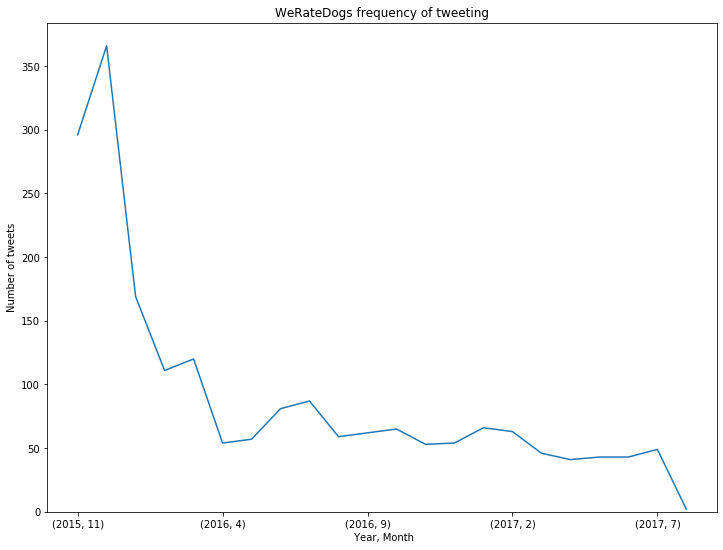

In [869]:
data = df.tweet_id.groupby([df['timestamp'].dt.year, df['timestamp'].dt.month]).count()
ax = data.plot(kind ='line', title = "WeRateDogs frequency of tweeting")
ax.set_xlabel(' Year, Month')
ax.set_ylabel('Number of tweets')
ax.set_ylim(0, )
plt.savefig('Frequency of tweets')